In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import ipywidgets

# Endogenous Growth: R&D Model With Capital



Goods Producing Sector
$$
Y(t) = [(1 - a_K)K(t)]^{\alpha}[A(t)(1 - a_L)L(t)]^{(1-\alpha)}
$$

R&D Sector
$$
\dot A(t) = B[{a_K}K(t)]^{\beta}[{a_L}L(t)]^{\gamma}A(t)^{\theta}
$$

Population
$$
\dot L(t) = nL(t)
$$

Capital
$$
\dot K(t) = sY(t)
$$


In [73]:
def RD_growth_model(n, gamma, theta, beta, alpha, L0, A0, T, s, K0, a, B):

    Y0 = ((A0*L0*(1 - a))**(1-alpha)) * (K0*(1 - a))**(alpha)  

    
    Lpath = np.zeros(T + 1)
    Apath = np.zeros(T + 1)
    Ypath = np.zeros(T + 1)
    Kpath = np.zeros(T + 1)  
    YLpath = np.zeros(T + 1)  
    AGpath = np.zeros(T + 1)
    KLpath = np.zeros(T + 1)


   
    Lpath[0] = L0
    Apath[0] = A0
    Ypath[0] = Y0
    Kpath[0] = K0  
    YLpath[0] = Y0/L0
    KLpath[0] = K0/L0


    for t in range(T):
        Adot = ((a * Lpath[t])**gamma) * B*((Kpath[t] * a)**beta) * Apath[t]**theta
        Apath[t + 1] = Apath[t] + Adot
        AGpath[t] = Adot / Apath[t]

        Ydot = ((Apath[t]*Lpath[t]*(1 - a))**(1-alpha)) * (Kpath[t]*(1 - a))**alpha
        Ldot = n * Lpath[t]
        Lpath[t+1] = Ldot + Lpath[t]

        Ypath[t + 1] = Ypath[t] + Ydot
        Kdot = s * Ypath[t]
        Kpath[t + 1] = Kpath[t] + Kdot

        YLpath[t + 1] = Ypath[t + 1] / Lpath[t + 1]
        KLpath[t + 1] = Kpath[t + 1] / Lpath[t + 1]
        GA = ((beta+gamma)/(1-(theta+beta)))*n

        
    
    t = np.arange(T + 1)

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].plot(t, YLpath)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Output per labor (Y/L)')
    axs[0].set_title('Output per Labor over Time')

    axs[1].plot(t, Apath)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Technology level (A)')
    axs[1].set_title('Technology Level over Time')
    
    axs[2].plot(t, AGpath)
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Growth of Technology level (A)')
    axs[2].set_title('Growth of Technology Level over Time')
    
    axs[3].plot(t, KLpath)
    axs[3].set_xlabel('Time')
    axs[3].set_ylabel('Capital per Labor (K/L)')
    axs[3].set_title('Capital per Labor over Time')
    

    plt.tight_layout()
    plt.show()
    
    print(f'g* = {GA}')
    

    
    


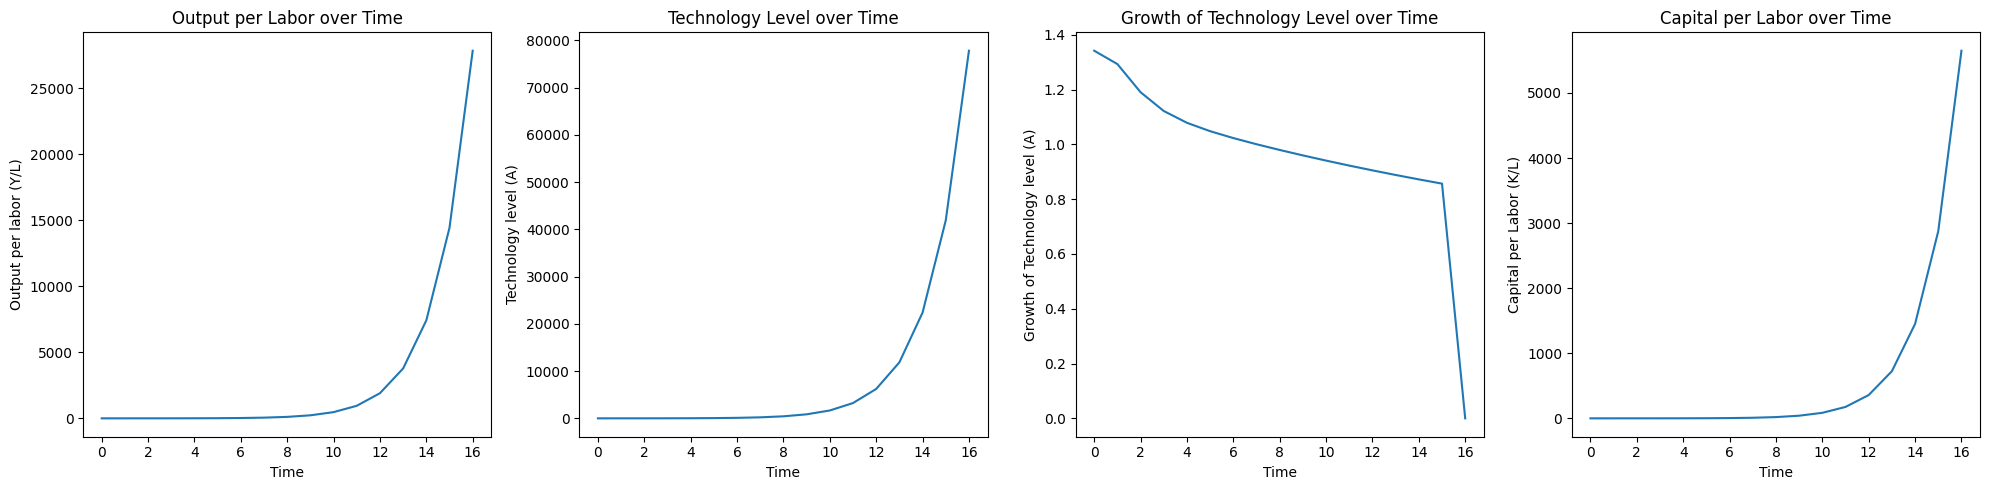

g* = 0.22000000000000008
None


In [74]:
mod1 = RD_growth_model(0.02, 0.7, 0.5, 0.4, 0.35, 30, 1, 16, 0.20, 1, 0.15, 1)
print(mod1)

In [76]:
interactive = ipywidgets.interactive(RD_growth_model, n=(0.0, 0.2, 0.01), s=(0.2), gamma=(0, 1.0, 0.05), theta=(0, 1.0, 0.05), beta=(0, 1.1, 0.1), alpha=(0, 1, 0.01), L0=20, A0=1, K0=2, T=10, a=(0, 1, 0.01), B=(0,5,1))
display(interactive)

interactive(children=(FloatSlider(value=0.1, description='n', max=0.2, step=0.01), FloatSlider(value=0.5, desc…